# The Neural Dynanmics of Valence and Intensity Encoding in the Amygdala and Prefrontal Cortex

**Authors:** Rahim Hashim, Roberto Gulli, Stefano Fusi, Daniel Salzman <br>
**Notebook Owner:** Rahim Hashim (rh2898@columbia.edu) <br>
***

# Import Libraries / Setting Task Parameters

In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
# Custom modules
import h5_helper
import preprocess_helper
from Path import Path
from Session import Session
pd.options.mode.chained_assignment = None  # default='warn'

ROOT = '/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/'
# ROOT = '/mnt/g/My Drive/Columbia/Salzman/Monkey-Training/'
EXPERIMENT = 'rhAirpuff'
TASK = 'Probabalistic_Airpuff_4x2'

path_obj = Path(ROOT, EXPERIMENT, TASK)

***
# Selecting Dates

In [16]:
# Specifying date/monkey/task
start_date = '2023-02-22' #@param {type:"date"}
end_date = '2023-02-22' #@param {type:"date"}
monkey_input = 'Aragorn' #@param ['Aragorn', 'Gandalf', 'Rob', 'Test']
reprocess_data = True #@param {type:"boolean"}
save_df =  True #@param {type:"boolean"}

# parse data
h5_filenames = h5_helper.h5_pull(path_obj.current_dir) # pull all .h5 files from specified directory
ml_config, trial_record, session_df, error_dict, behavioral_code_dict\
	= preprocess_helper.preprocess_data(h5_filenames,
																			path_obj,
																			start_date,
																			end_date,
																			monkey_input,
																			reprocess_data,
																			save_df)
# dates_selected = ['220913', '220928', '220929', '221006', '221019', '221026',
# 									'221207', '221214', '230102', '230118', '230120', '230130',
# 									'230214', '230215', '230216']
# session_df = session_df.loc[(session_df['date'].isin(dates_selected))]

Pulling '.h5' files...
Complete: 102 '.h5' files pulled
Loading selected file(s):
  Copy of 230222_Aragorn_airpuff.h5 - Completed
Converting .h5 to python:
  <HDF5 file "Copy of 230222_Aragorn_airpuff.h5" (mode r)>
  Total number of trials: 546


0it [00:00, ?it/s]

    Correct trials: 414
    Errored trials: 132
Saving .pickle files to: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/processed/processed_Probabalistic_Airpuff_4x2
  Pickling 230222_Aragorn_r1r2_behave.pkl
    Total time to pickle: 0.2033 sec


***
# Adding Fields / Creating Session Object

In [17]:
plt.style.use('dark_background')
from add_fields import add_fields
# import importlib
# importlib.reload(add_fields)

# session_obj contains session metadata
session_obj = Session(session_df, monkey_input, TASK, behavioral_code_dict)

# adds custom fields
session_df, session_obj = add_fields(session_df,
																		 session_obj, 
																		 behavioral_code_dict)
from image_diff import image_diff
FIGURE_SAVE_PATH = image_diff(session_df,
															session_obj,
															path_obj,
															combine_dates=True) # combine_dates=True will combine all dates into analysis
session_obj.save_paths(path_obj.TARGET_PATH, 
											 path_obj.TRACKER_PATH, 
											 path_obj.VIDEO_PATH,
											 FIGURE_SAVE_PATH)
session_df_correct = session_df[session_df['correct'] == 1]

 Creating Session Objects...
  Min Values (X,Y): (-29.32,-42.601)
  Max Values (X,Y): (71.653,97.254)
 Adding additional fields to session_df DataFrame...


/Users/rahimhashim/My Drive/Columbia/Salzman/Monkey-Training/Monkey-Emotion-Behavior/helper/add_fields.py:303: RuntimeWarning: Mean of empty slice
  lick_avg = np.nanmean(lick_in_window)


  20 new fields added.
  Index(['date', 'session_num', 'subject', 'trial_num', 'block', 'condition',
         'correct', 'error', 'error_type', 'behavioral_code_markers',
         'behavioral_code_times', 'stimuli_name', 'x_pos', 'y_pos', 'reward',
         'reward_prob', 'reward_mag', 'reward_drops', 'reward_length', 'airpuff',
         'airpuff_prob', 'airpuff_mag', 'airpuff_pulses', 'airpuff_side_L',
         'airpuff_side_R', 'eye_x', 'eye_y', 'eye_pupil', 'lick', 'photodiode',
         'trial_start', 'trial_datetime_start', 'trial_datetime_end',
         'Start Trial', 'Fixation On', 'Fixation Success', 'CS On', 'CS Off',
         'Trace Start', 'Trace End', 'Outcome Start', 'Reward Trigger',
         'Airpuff Trigger', 'Outcome', 'Outcome End', 'Manual Reward',
         'End Trial', 'valence', 'lick_raster', 'blink_raster', 'trial_bins',
         'trial_in_block', 'fractal_count_in_block', 'reward_1_back',
         'reward_2_back', 'reward_3_back', 'reward_4_back', 'reward_5_back

  epoch_hist.png saved.


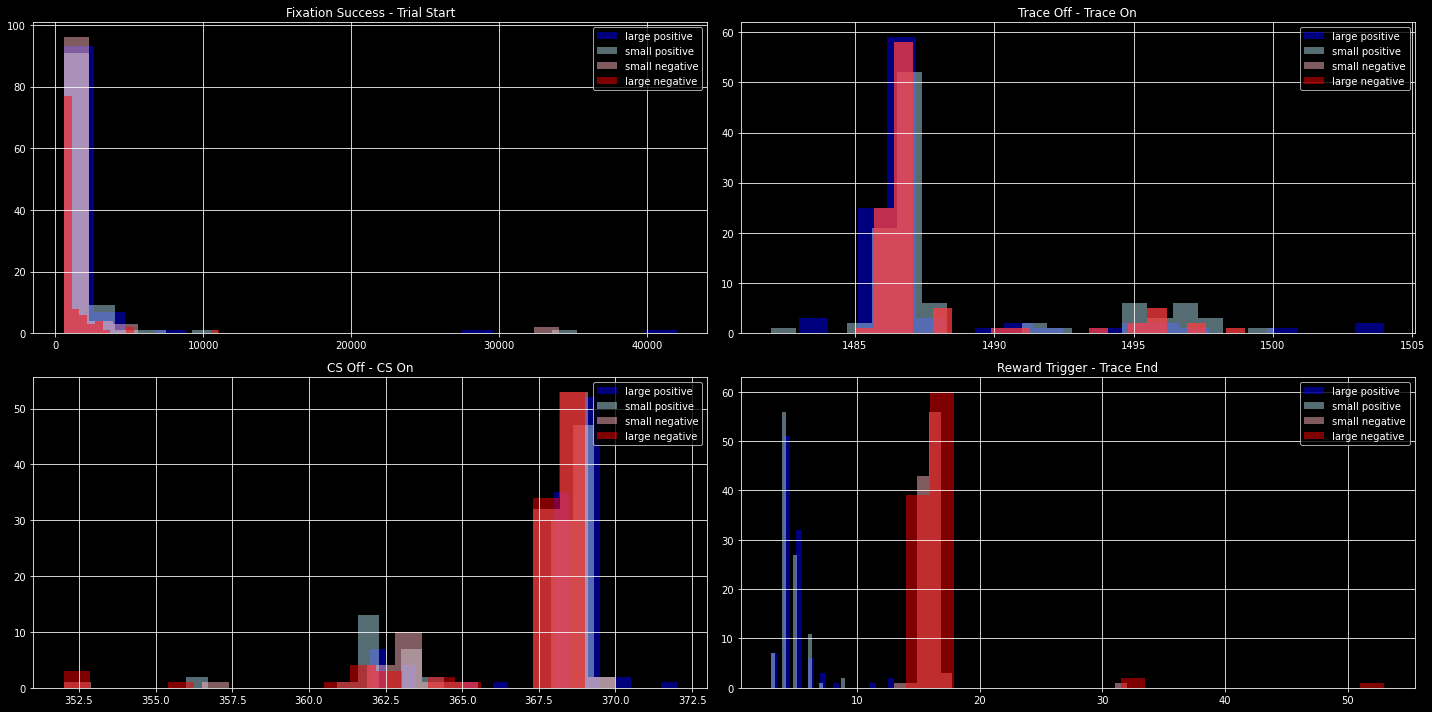

  lick_vs_blink.png saved.
  perf_by_fractal.png saved.
  session_latency.png saved.
  outcome_params.png saved.
  session_lick_avg.png saved.
  session_blink_avg.png saved.
  fractal_lick_raster.png saved.
  fractal_blink_raster.png saved.
  Trial Number of cs min: 113
    cs average: 368
    cs min: 352 | index: 51
  Trial Number of trace min: 59
    trace + cs average: 1856
    trace + cs min: 1835 | index: 8
  Trial Number of outcome min: 194
    outcome + cs average: 2923
    outcome + cs min: 2900
  raster_by_cond_1.png saved.
  Trial Number of cs min: 485
    cs average: 367
    cs min: 352 | index: 135
  Trial Number of trace min: 371
    trace + cs average: 1855
    trace + cs min: 1834 | index: 51
  Trial Number of outcome min: 324
    outcome + cs average: 2921
    outcome + cs min: 2893
  raster_by_cond_2.png saved.
 [0.0, 0.5, 1.0] ANOVA 166.584 | P-value: 9.09E-47
  (0, 1) T-value: -11.264 P-value: 3.53E-21 |  Z-value: -10.994 P-value: 4.09E-28
    0 Lick Mean: 0.213 Lick

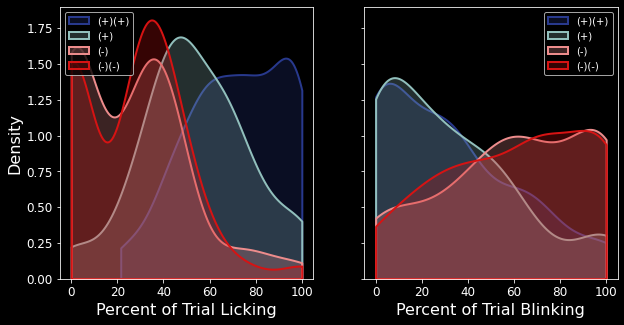

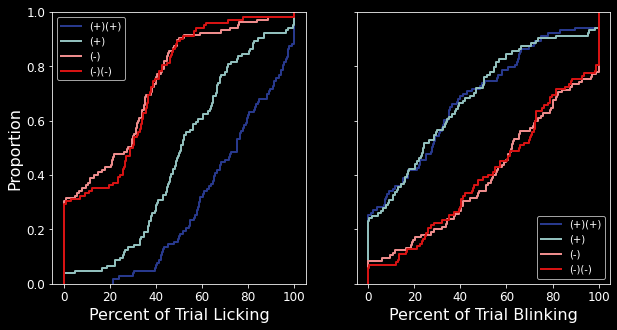

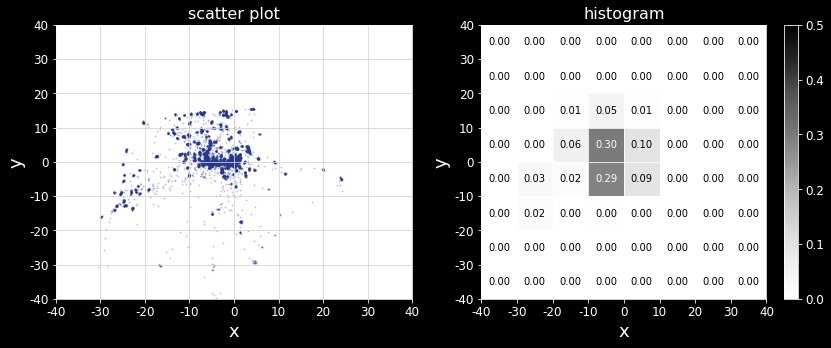

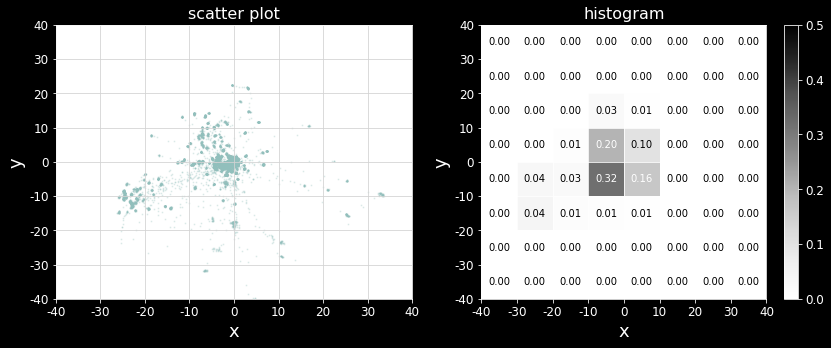

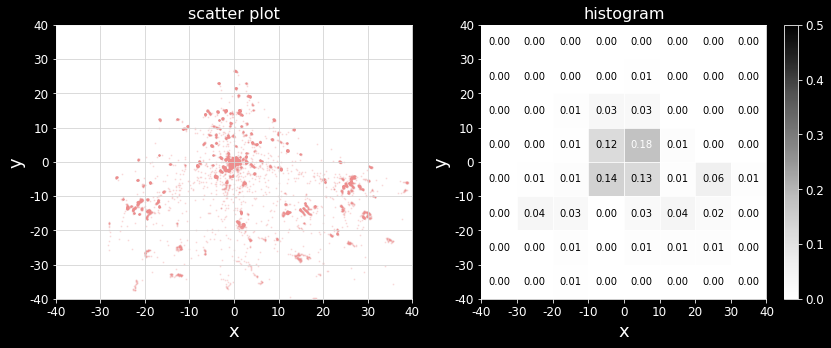

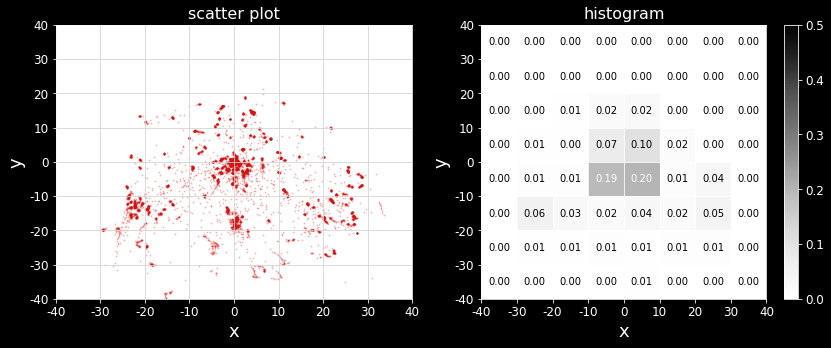

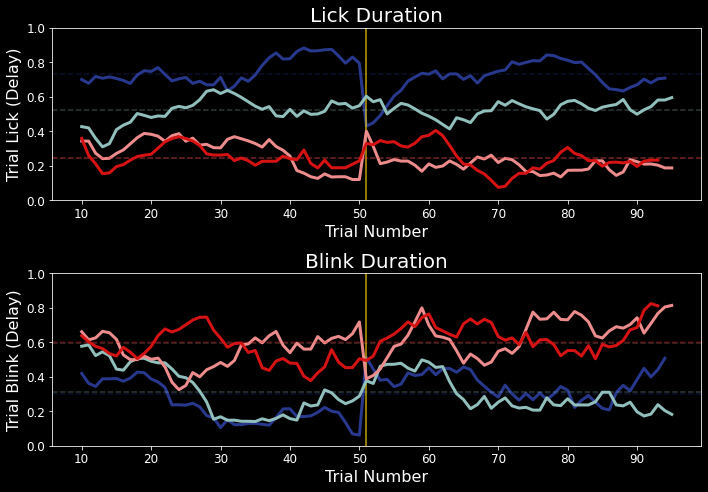

In [18]:
from run_functions import run_functions
for date in session_df_correct['date'].unique():
	session_df_date = session_df_correct[session_df_correct['date'] == date]
	session_obj = run_functions(session_df_date, session_obj, path_obj, 
														behavioral_code_dict, error_dict, FIGURE_SAVE_PATH)

  epoch_hist.png saved.


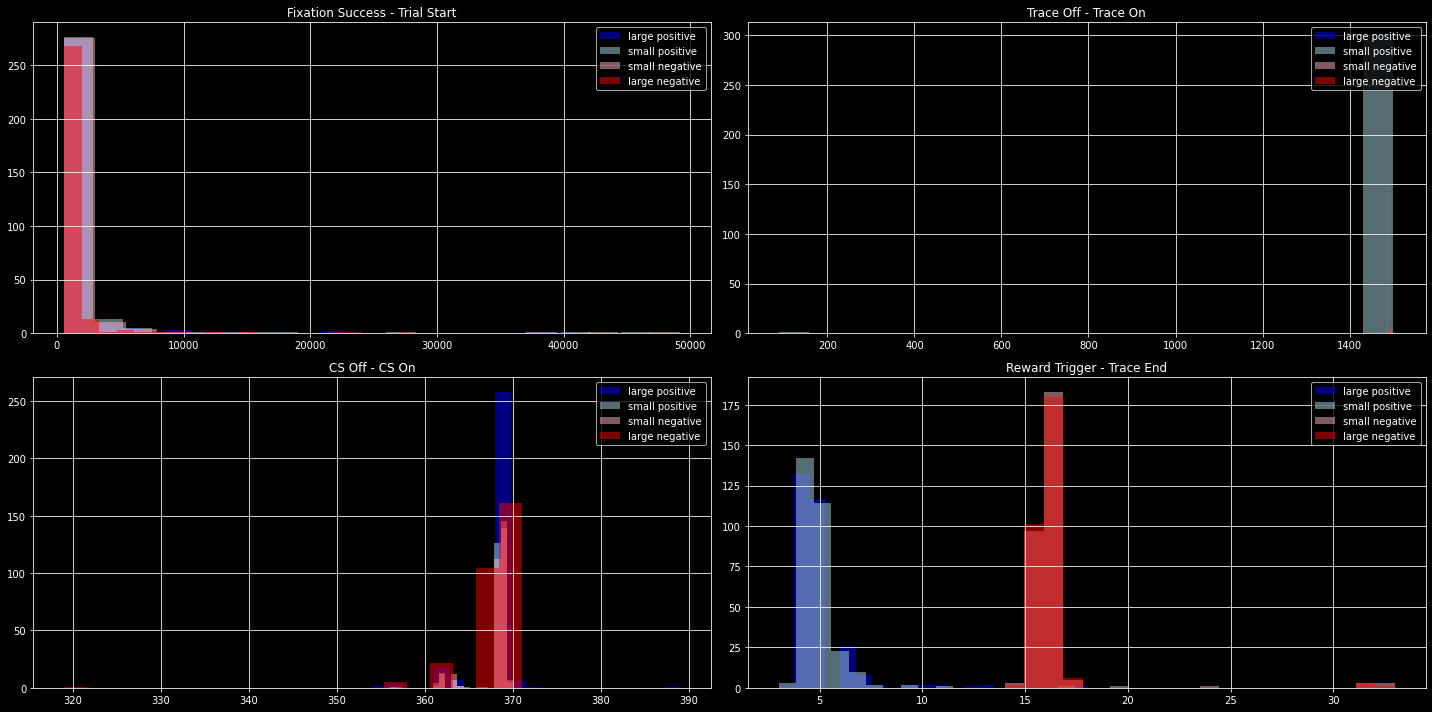

  lick_vs_blink.png saved.
  perf_by_fractal.png saved.
  session_latency.png saved.
  outcome_params.png saved.
  session_lick_avg.png saved.
  session_blink_avg.png saved.
  fractal_lick_raster.png saved.
  fractal_blink_raster.png saved.
  Trial Number of cs min: 114
    cs average: 368
    cs min: 319 | index: 183
  Trial Number of trace min: 136
    trace + cs average: 1852
    trace + cs min: 407 | index: 358
  Trial Number of outcome min: 78
    outcome + cs average: 2922
    outcome + cs min: 2868
  raster_by_cond_1.png saved.
  Trial Number of cs min: 320
    cs average: 368
    cs min: 354 | index: 80
  Trial Number of trace min: 368
    trace + cs average: 1856
    trace + cs min: 1839 | index: 443
  Trial Number of outcome min: 247
    outcome + cs average: 2923
    outcome + cs min: 2906
  raster_by_cond_2.png saved.
 [0.0, 0.5, 1.0] ANOVA 551.576 | P-value: 2.46E-144
  (0, 1) T-value: -21.246 P-value: 4.83E-66 |  Z-value: -20.834 P-value: 2.15E-96
    0 Lick Mean: 0.288 L

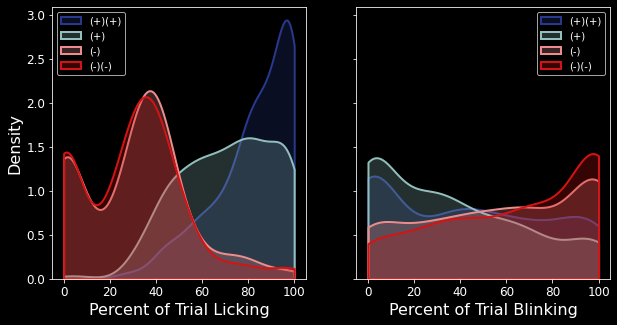

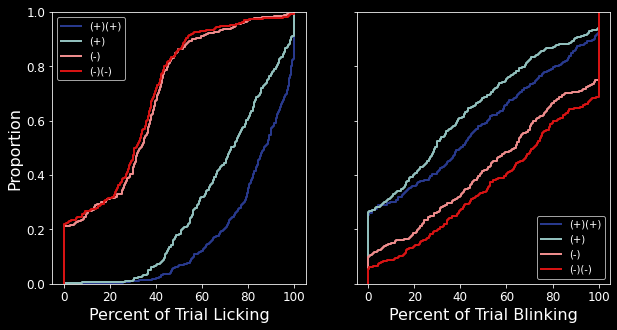

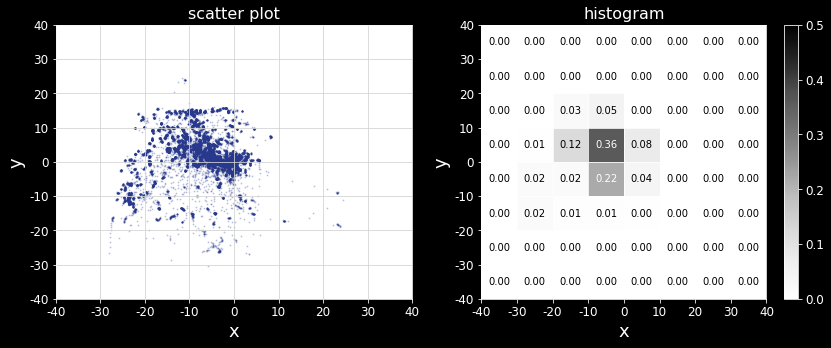

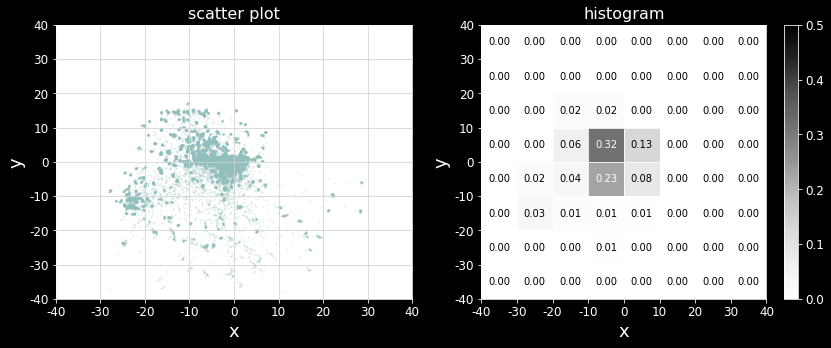

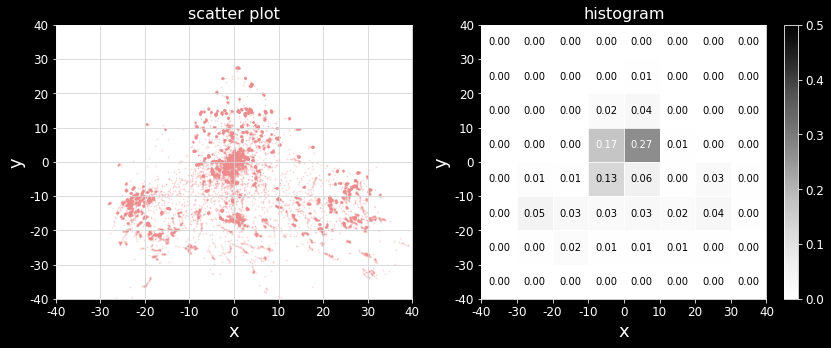

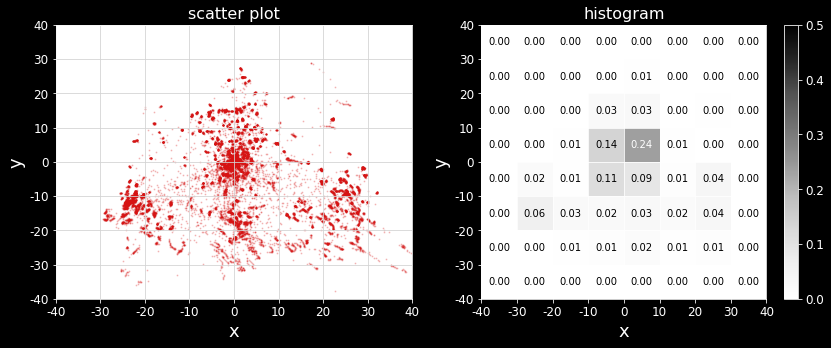

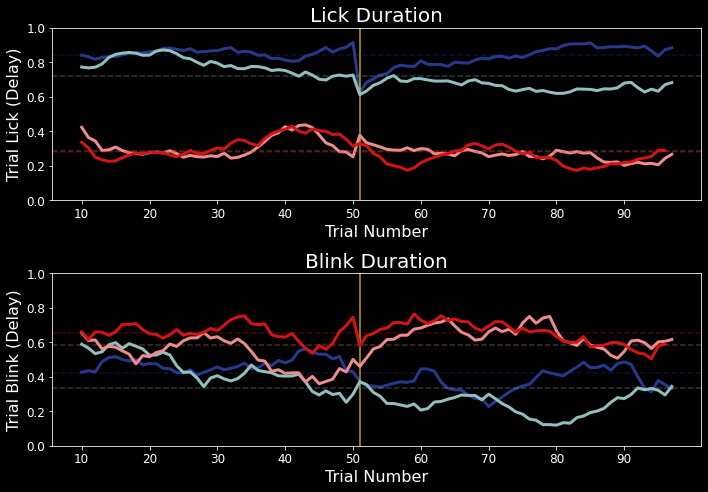

In [7]:
from run_functions import run_functions
run_functions(session_df_correct, session_obj, path_obj, 
							behavioral_code_dict, error_dict, FIGURE_SAVE_PATH)

In [8]:
session_df_correct.groupby(['valence']).mean()[['lick_duration',
																								'blink_duration_offscreen',
																								'pupil_raster_window_avg',
																								'eye_distance']]

,lick_duration,blink_duration_offscreen,pupil_raster_window_avg,eye_distance
valence,,,,
-1.0,0.294735,0.646751,0.240328,306.220621
-0.5,0.307575,0.580732,0.186298,277.076264
0.5,0.712606,0.353589,0.038746,139.025639
1.0,0.828063,0.421278,0.036034,103.042983


Total Eye Positions: 135000
Histogram Positions: 129993
-40.0   -30.0   -20.0   -10.0   0.0   10.0   20.0   30.0   
[[0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.0002 0.     0.     0.     0.     0.    ]
 [0.     0.     0.0016 0.     0.     0.     0.     0.    ]
 [0.     0.004  0.011  0.0647 0.1025 0.0012 0.     0.    ]
 [0.     0.0064 0.0222 0.3078 0.2685 0.0172 0.     0.    ]
 [0.     0.0007 0.0112 0.0203 0.0733 0.0144 0.0013 0.    ]
 [0.     0.0007 0.0299 0.0289 0.0104 0.0017 0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]]
outside x,y [-10, 10]: 25.65%
outside x,y [-40, 40]: 3.71%
  eye_heatmap_1.0.png saved.
Total Eye Positions: 135000
Histogram Positions: 127666
-40.0   -30.0   -20.0   -10.0   0.0   10.0   20.0   30.0   
[[0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.0032 0.006  0.     0.     0.     0.    ]
 [0.0006 0.0002 0.0026 0.0005 0.     0.     0.     0.    ]
 [0.0021 0.0052 0.0116 0.0935 

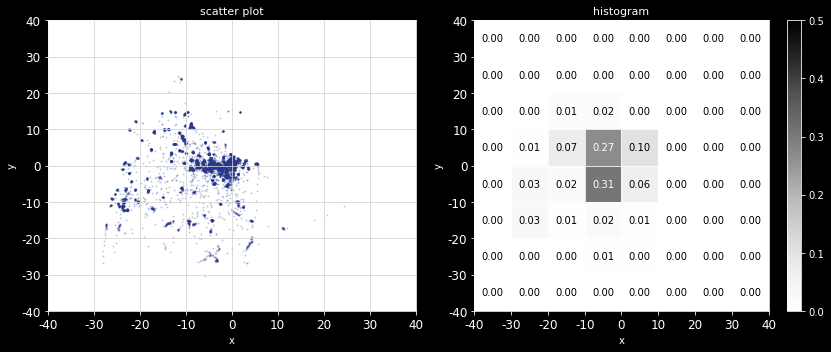

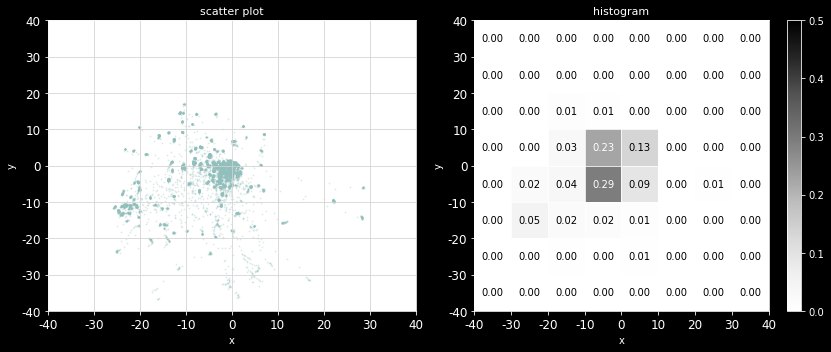

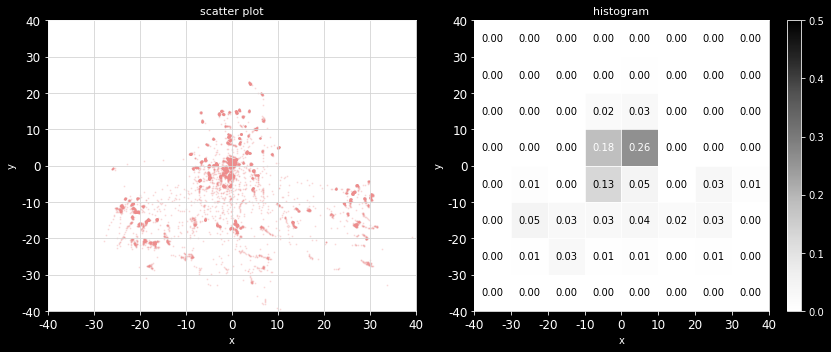

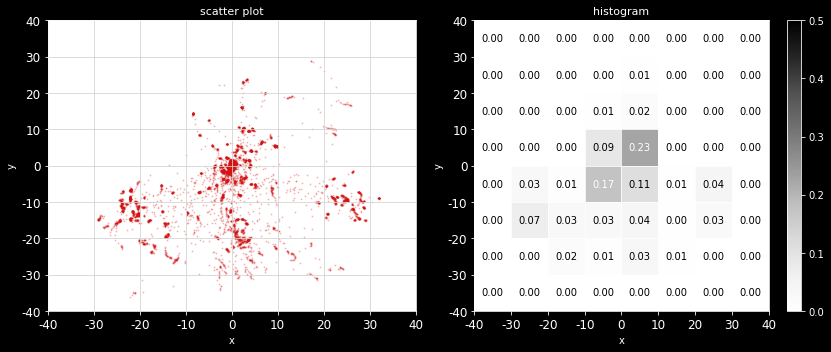

In [149]:
from eyetracking_analysis import eyetracking_analysis
eyetracking_analysis(session_df_correct, session_obj, TRIAL_THRESHOLD=5)

In [140]:
from raster_by_condition import raster_by_condition
from two_sample_test import t_test_moving_avg
for block in sorted(session_df_correct['condition'].unique()):
	session_df_condition = session_df_correct[session_df_correct['condition'] == block]
	raster_by_condition(session_df_condition, session_obj)
	t_test_moving_avg(session_df_condition, session_obj, block)

  Trial Number of cs min: 146
    cs average: 368
    cs min: 356 | index: 88
    trace + cs average: 1845
    trace + cs min: 444 | index: 78
  Trial Number of outcome min: 66
    outcome + cs average: 2922
    outcome + cs min: 2908
  raster_by_cond_1.png saved.
  Trial Number of cs min: 267
    cs average: 368
    cs min: 356 | index: 22
    trace + cs average: 1856
    trace + cs min: 1841 | index: 103
  Trial Number of outcome min: 268
    outcome + cs average: 2923
    outcome + cs min: 2908
  raster_by_cond_2.png saved.


In [141]:
blink_trials = session_df_correct[session_df_correct['pupil_binary_zero'] == 1].index.tolist()

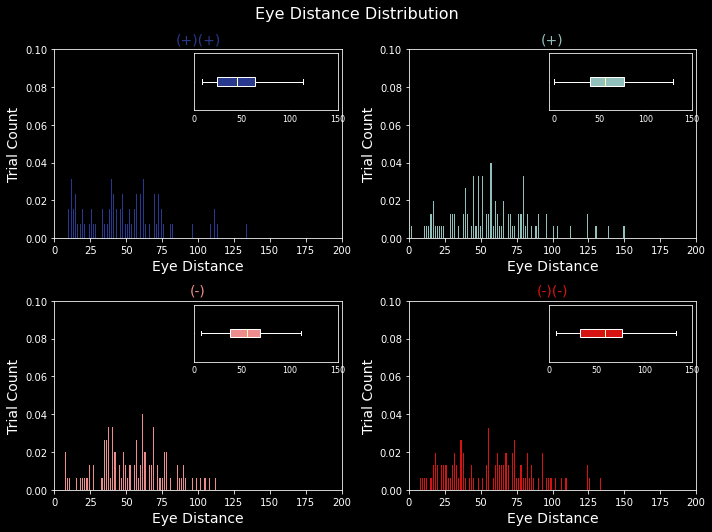

In [142]:
import seaborn as sns
import matplotlib.cm as cm
from PIL import ImageColor
import matplotlib.colors
from mpl_toolkits.axes_grid.inset_locator import inset_axes
# Custom Functions
from eyetracking_analysis import calc_dist

plt.style.use('dark_background')

def plot_dist_histogram(valence_eye_distances, axarr, bins, valence_color, valence_label):
	eye_distances_filtered = sorted([x for x in valence_eye_distances if x != 0], reverse=False)
	results = axarr.hist(eye_distances_filtered, bins=bins, ec='black', facecolor=valence_color, alpha=1, density=True)
	# hist_upper_x = 0.6
	# hist_upper_y = 30
	# xrange = np.arange(0, hist_upper_x, 0.1)
	# xrange = [round(x, 1) for x in xrange]
	# axarr.set_xticks(xrange)
	# axarr.set_xticklabels(xrange)
	# axarr.set_xlim([-0.05, hist_upper_x])
	# axarr.set_ylim([0, hist_upper_y])
	axarr.set_xlabel('Eye Distance', fontsize=14)
	axarr.set_ylabel('Trial Count', fontsize=14)
	boxplot_axes = inset_axes(axarr, width="50%", height="30%", loc=1)
	bp_results = boxplot_axes.boxplot(eye_distances_filtered, vert=False, showfliers=False, patch_artist=True)
	boxplot_axes.tick_params(axis='x', size=0.5)    #setting up X-axis tick color to red
	boxplot_axes.tick_params(axis='y', size=0.5)  #setting up Y-axis tick color to black
	for patch, color in zip(bp_results['boxes'], valence_color):
		rgb = matplotlib.colors.to_rgb(valence_color)
		patch.set_facecolor(rgb)
	xrange = np.arange(0, 200, 50)
	boxplot_axes.set_xticks(xrange)
	boxplot_axes.set_xticklabels(xrange, fontsize=8)
	boxplot_axes.set_yticklabels([])
	# boxplot_axes.set_aspect(.4)
	axarr.set_title(valence_label, fontsize=14, color=valence_color)
	axarr.set_xlim([0,200])
	axarr.set_ylim([0,0.1])
	f.tight_layout()
	whisker_data = bp_results['whiskers']
	lower_whisker, upper_whisker = [item.get_xdata()[1] for item in whisker_data]

f, axarr = plt.subplots(2, 2, figsize=(10, 7.5))
f.suptitle('Eye Distance Distribution', fontsize=16)
all_eye_distances = []
for v_index, valence in enumerate(sorted(session_df_correct['valence'].unique(), reverse=True)):
	# see if 1 is in pupil_raster_window column
	session_valence = session_df_correct[session_df_correct['valence'] == valence]
	# blink_trials = session_valence[session_valence['pupil_binary_zero'] == 1].index.tolist()
	valence_eye_distances = []
	for trial in session_valence.index.tolist():
		trial_index = trial
		# eye_distance = session_valence['eye_distance'][trial_index]
		session_df_selected = session_valence.loc[trial_index]
		trace_start = session_df_selected['Trace Start']
		trace_end = session_df_selected['Trace End']
		eye_x = session_df_selected['eye_x'][trace_start:trace_end]
		eye_y = session_df_selected['eye_y'][trace_start:trace_end]
		eye_coordinates = list(zip(eye_x, eye_y))
		trial_distances = []
		for eye_index, eye_pos in enumerate(eye_coordinates):
			# skip first eye position
			if eye_index == 0:
				continue
			dist = calc_dist(eye_pos[0], eye_coordinates[eye_index-1][0],
											eye_pos[1], eye_coordinates[eye_index-1][1])
			# skip if distance is greater than 10 (caused by blink signal)
			if dist < 10:
				trial_distances.append(dist)
		valence_eye_distances.append(np.nansum(trial_distances))
		all_eye_distances.append(np.nansum(trial_distances))
	eye_distances_filtered_all = sorted([x for x in valence_eye_distances if x != 0], reverse=False)
	if v_index == 0:
		axindex = axarr[0][0]
	elif v_index == 1:
		axindex = axarr[0][1]
	elif v_index == 2:
		axindex = axarr[1][0]
	elif v_index == 3:
		axindex = axarr[1][1]
	valence_color = session_obj.valence_colors[valence]
	valence_label = session_obj.valence_labels[valence]
	bins = np.histogram(all_eye_distances, bins=100)[1] # get the bin edges for all valence eye distances
	plot_dist_histogram(valence_eye_distances, axindex, bins, valence_color, valence_label)
plt.show()

In [143]:
from eyetracking_analysis import calc_dist

def calc_eye_dist(trial, session_obj, blink_bin_threshold):
	trace_window = session_obj.window_blink
	blink_raster = np.array(trial['pupil_raster_window'])
	trace_off_time = trial['Trace End']
	eye_x, eye_y = trial['eye_x'], trial['eye_y']
	eye_x = eye_x.tolist()[trace_off_time-trace_window:trace_off_time]
	eye_y = eye_y.tolist()[trace_off_time-trace_window:trace_off_time]
	# calculate eye velocities
	eye_coordinates = list(zip(eye_x, eye_y))
	eye_distances = []
	for eye_index, eye_pos in enumerate(eye_coordinates):
		if eye_index == 0:
			dist_val = np.nan
		else:
			dist_val = calc_dist(eye_pos[0], eye_coordinates[eye_index-1][0],
													 eye_pos[1], eye_coordinates[eye_index-1][1])
		eye_distances.append(dist_val)
	trial['eye_distances_window'] = eye_distances
	# calculate eye distances before blinks
	all_blinks = np.where(blink_raster==1)[0]
	if len(all_blinks) == 0:
		trial['eye_distances_preblink'] = np.nan
		return trial
	preblink_indices = []
	preblink_distances = []
	for blink_bin in all_blinks:
		# if blink_bin is less than threshold, add all eye distances before blink
		if blink_bin < blink_bin_threshold:
			preblink_distances.append(eye_distances[:blink_bin])
			preblink_indices += list(range(blink_bin))
		else:
			preblink_bins = list(range(blink_bin-blink_bin_threshold, blink_bin))
			# if preblink_bins are already in preblink_indices, skip
			preblink_distances.append(\
				[eye_distances[i] for i in preblink_bins if i not in preblink_indices])
			preblink_indices += preblink_bins
	trial['eye_distances_preblink'] = preblink_distances
	return trial

blink_bin_threshold = 20
session_df_correct = \
		session_df_correct.apply(calc_eye_dist, session_obj=session_obj, blink_bin_threshold=blink_bin_threshold, axis=1)

Calculating eye distances for 20 bins before blink
Eye Velocity Means
  All: 41.29
  Preblink: 30.5
Eye Velocity Quantiles
 All
  25%: 20.74 | 50%: 35.71 | 75%: 52.91
 Preblink
  25%: 0.08 | 50%: 0.68 | 75%: 4.84


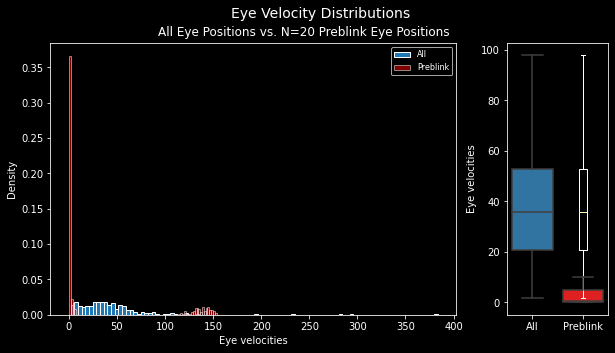

In [144]:
import seaborn as sns
import matplotlib.gridspec as gridspec
blink_bin_threshold = 20
print('Calculating eye distances for {} bins before blink'.format(blink_bin_threshold))
def flattenList(nestedList):
	# check if list is empty
	if not(bool(nestedList)):
		return nestedList
	# to check instance of list is empty or not
	if isinstance(nestedList[0], list):
		# call function with sublist as argument
		return flattenList(*nestedList[:1]) + flattenList(nestedList[1:])
	# call function with sublist as argument
	return nestedList[:1] + flattenList(nestedList[1:])

def plot_eye_dist_histogram(session_df):
	# all distances
	all_distances = session_df_correct['eye_distance'].tolist()
	flat_list_all = flattenList(all_distances)
	eye_distances_filtered_all = sorted([x for x in flat_list_all if x > 0.01], reverse=False)

	# preblink distances
	preblink_distances = session_df_correct['eye_distances_preblink'].tolist()
	flat_list_preblink = flattenList(preblink_distances)
	preblink_filtered_all = sorted([x for x in flat_list_preblink if x > 0.01], reverse=False)
	print('Eye Velocity Means')
	print('  All: {}'.format(round(np.nanmean(eye_distances_filtered_all), 2)))
	print('  Preblink: {}'.format(round(np.nanmean(preblink_filtered_all), 2)))
	print('Eye Velocity Quantiles')
	for data in [eye_distances_filtered_all, preblink_filtered_all]:
		if data == eye_distances_filtered_all:
			print(' All')
		else:
			print(' Preblink')
		print('  25%: {} | 50%: {} | 75%: {}'.format(
			round(np.nanquantile(data, 0.25), 2),
			round(np.nanquantile(data, 0.5), 2),
			round(np.nanquantile(data, 0.75), 2)))
	gs_kw = dict(width_ratios=[4, 1])
	f, axarr = plt.subplots(1, 2, figsize=(10,5), gridspec_kw=gs_kw)
	axarr[0].hist(eye_distances_filtered_all, bins=100, density=True, color='#1f77b4', label='All', lw=1, ec='white')
	axarr[0].hist(preblink_filtered_all, bins=100, density=True, color='red', label='Preblink', alpha=0.5, lw=1, ec='white')
	axarr[0].legend()
	axarr[0].set_xlabel('Eye velocities')
	axarr[0].set_ylabel('Density')
	axarr[1].boxplot([eye_distances_filtered_all, preblink_filtered_all], labels=['All', 'Preblink'], showfliers=False)
	ax = sns.boxplot(ax=axarr[1], data=[eye_distances_filtered_all, preblink_filtered_all], 
									palette=['#1f77b4', 'red'], showfliers=False)
	axarr[1].set_xticklabels(['All', 'Preblink'])
	axarr[1].set_ylabel('Eye velocities')
	plt.suptitle('Eye Velocity Distributions')
	plt.text(-2, 1.025, 'All Eye Positions vs. N={} Preblink Eye Positions'.format(blink_bin_threshold), 
					horizontalalignment='center', fontsize=12, transform=ax.transAxes)
	plt.show()

plot_eye_dist_histogram(session_df_correct)

[0, 1, 2, 4, 6, 7, 8, 9, 12, 15, 17, 18, 19, 20, 21, 22, 25, 29, 39, 46, 49, 50, 52, 54, 55, 57, 60, 61, 71, 74, 77, 80, 82, 83, 85, 92, 93, 94, 97, 100, 109, 123, 130, 131, 139, 145, 155, 165, 166, 169, 182, 185, 190, 191, 195, 200, 201, 203, 210, 211, 226, 230, 231, 233, 234, 237, 238, 239, 241, 246, 247, 248, 249, 250, 251, 252, 253, 254, 257, 258, 264, 266, 268, 269, 271, 275, 277, 280, 281, 285, 286, 288, 294, 309, 310, 312, 313, 318, 329, 333, 336, 341, 348, 351, 379, 382, 383, 385, 389, 405, 422]
422 609 1 13.938706873806817 -24.138000923470674 0.0
422 609 2 13.918316995227226 -24.16337017616844 0.03254759792877958
422 609 3 13.918316995227226 -24.16337017616844 0.0
422 609 4 13.917838853600017 -24.158536682494194 0.004857085598857505
422 609 5 13.917838853600017 -24.158536682494194 0.0
422 609 6 13.917360720806997 -24.153703278123995 0.004856995858925768
422 609 7 13.917360720806997 -24.153703278123995 0.0
422 609 8 13.917360720806997 -24.153703278123995 0.0
422 609 9 13.917360

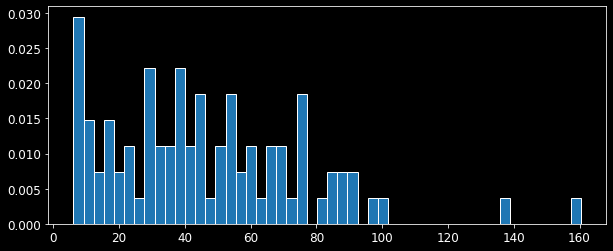

0.0
0.03254759792877958
0.0
0.004857085598857505
0.0
0.004856995858925768
0.0
0.0
0.0
0.05474085797797046
0.0
0.00456213645565656
0.0
0.06510054162735118
0.0
0.08421801531757837
0.0
0.038665330219333785
0.0
0.045603480623663685
0.0
0.044133530470321584
0.0
0.07751147598550777
0.0
0.01052119791339852
0.0
0.0
0.0


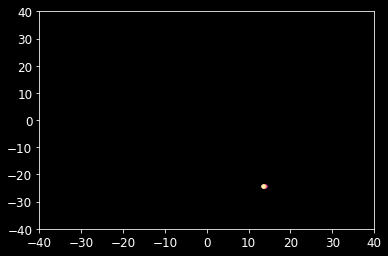

In [105]:
num_samples = 30
palette_tab10 = sns.color_palette("magma", num_samples)

blink_trials = session_df_correct[session_df_correct['pupil_binary_zero'] == 1].index.tolist()
print(blink_trials)
for trial in blink_trials:
	trial_index = trial
	session_df_selected = session_df_correct.loc[trial_index]
	trace_start = session_df_selected['Trace Start']
	trace_end = session_df_selected['Trace End']
	eye_x = session_df_selected['eye_x'][trace_start:trace_end]
	eye_y = session_df_selected['eye_y'][trace_start:trace_end]
	eye_coordinates = list(zip(eye_x, eye_y))
	for eye_index, eye_pos in enumerate(eye_coordinates):
		# skip first eye position
		if eye_index == 0:
			continue
		dist = calc_dist(eye_pos[0], eye_coordinates[eye_index-1][0],
										eye_pos[1], eye_coordinates[eye_index-1][1])
		# skip if distance is greater than 10 (caused by blink signal)
		if dist > 10:
			continue
		all_eye_distances.append(dist)
eye_distances_filtered_all = sorted([x for x in valence_eye_distances if x != 0], reverse=False)
pupil = session_df_selected['eye_pupil'][trace_start:trace_end]
pupil_raster = session_df_selected['pupil_raster_window']
all_blinks = np.where(pupil==0)[0]
for b_index, blink in enumerate(all_blinks):
	if b_index == 0 or blink-1 not in all_blinks:
		eye_x_preblink = eye_x[blink-num_samples:blink]
		eye_y_preblink = eye_y[blink-num_samples:blink]
		eye_preblink = list(zip(eye_x_preblink, eye_y_preblink))
		for eye_index, eye_pos in enumerate(eye_preblink):
			if eye_index == 0:
				continue
			print(trial_index, blink, eye_index,eye_pos[0], eye_pos[1],
				calc_dist(eye_pos[0], eye_preblink[eye_index-1][0],
									eye_pos[1], eye_preblink[eye_index-1][1]))
		break
	break
f, axarr = plt.subplots(1, 1, figsize=(10, 4))
axarr.hist(eye_distances_filtered_all, bins=50, ec='white', color='#1f77b4', density=True)
plt.show()

first_blink = np.where(pupil==0)[0][0]
eye_x_preblink = eye_x[first_blink-num_samples:first_blink]
eye_y_preblink = eye_y[first_blink-num_samples:first_blink]

eye_preblink = list(zip(eye_x_preblink, eye_y_preblink))
for eye_index, eye_pos in enumerate(eye_preblink):
	if eye_index == 0:
		continue
	print(
		calc_dist(eye_pos[0], eye_preblink[eye_index-1][0],
							eye_pos[1], eye_preblink[eye_index-1][1]))
for eye_index, eye_pos in enumerate(eye_preblink):
	plt.scatter(eye_pos[0], eye_pos[1], s=8, color=palette_tab10[eye_index])
plt.xlim([-40, 40])
plt.ylim([-40, 40])
plt.show()

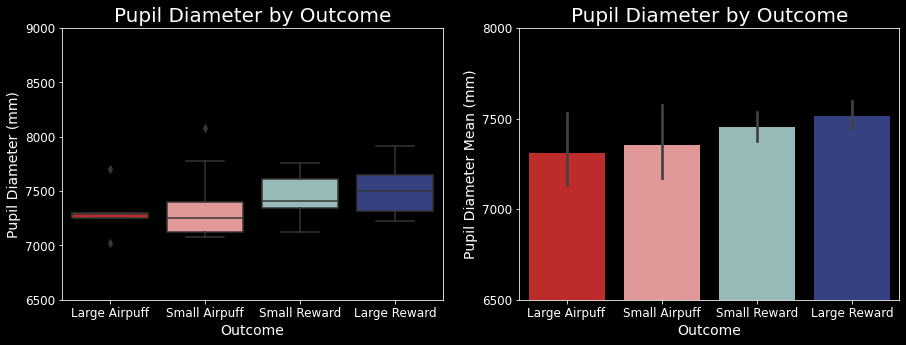

valence
-1.0     5
-0.5    10
 0.5    17
 1.0    26
Name: pupil_mean, dtype: int64
         pupil_preblink
valence                
-1.0                 13
-0.5                 17
 0.5                 18
 1.0                  9


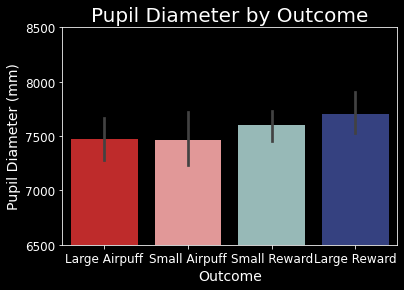

In [145]:
from pupil_analysis import pupil_valence_no_blink, pupil_preblink
pupil_valence_no_blink(session_df_correct, session_obj)
pupil_preblink(session_df_correct, session_obj)

In [ ]:
import matplotlib.pyplot as plt
from plot_helper import set_plot_params

def eye_data_delay(row, trace_window):
	delay_end = row['Trace End']
	eye_x = row['eye_x'][delay_end-trace_window:delay_end]
	eye_y = row['eye_y'][delay_end-trace_window:delay_end]
	row['eye_x_delay'] = eye_x
	row['eye_y_delay'] = eye_y
	return row

def eye_outside_threshold(row):
	blink_count_window = row['blink_count_window']
	eye_x = row['eye_x_delay']
	eye_y = row['eye_y_delay']
	try:
		# print(list(zip(eye_x, eye_y, blink_raster)))
		eye_x_threshold = [x for x_index, x in enumerate(eye_x)
												if blink_count_window[x_index] == 1]
		eye_y_threshold = [y for y_index, y in enumerate(eye_y)
												if blink_count_window[y_index] == 1]
	except:
		eye_x_threshold = []
		eye_y_threshold = []
	row['eye_x_threshold'] = eye_x_threshold
	row['eye_y_threshold'] = eye_y_threshold
	return row

def eye_signal_delay(row, session_obj):
	eye_blink_signal = session_obj.blink_signal
	BLINK_SIGNAL = [(eye_blink_signal['eye_x_min'], eye_blink_signal['eye_y_min']),
									(eye_blink_signal['eye_x_max'], eye_blink_signal['eye_y_max'])]
	eye_x = row['eye_x_delay']
	eye_y = row['eye_y_delay']
	blink_count = [1 if (x,y) in BLINK_SIGNAL else 0 
									for (x,y) in zip(eye_x, eye_y)]
	eye_x_threshold = [x for x_index, x in enumerate(eye_x)
											if blink_count[x_index] == 0]
	eye_y_threshold = [y for y_index, y in enumerate(eye_y)
											if blink_count[y_index] == 0]

	row['eye_x_sig'] = eye_x_threshold
	row['eye_y_sig'] = eye_y_threshold

	return row

def plot_eye_data(session_df, session_obj):
	import seaborn as sns

	# trial_numbers = input('Enter trial numbers to plot (e.g. 1,2,3...{}): '.format(len(session_df)))
	# row = session_df.iloc[int(trial_numbers)]
	# trial_numbers = list(row.index)
	COLORS = session_obj.valence_colors
	session_df = session_df.apply(eye_data_delay, 
					trace_window = session_obj.window_blink, axis=1)
	session_df = session_df.apply(eye_outside_threshold, axis=1)
	session_df = session_df.apply(eye_signal_delay, 
															  session_obj=session_obj,
																axis=1)
	for v_index, valence in enumerate(sorted(session_df['valence'].unique(), reverse=True)):
		set_plot_params(FONT=12,
										AXES_TITLE=16,
										AXES_LABEL=18, 
										TICK_LABEL=12, 
										LEGEND=10, 
										TITLE=20)
		f, ax = plt.subplots(1, 1, figsize=(10, 10))
		df = session_df[session_df['valence'] == valence]
		for index, row in df.iterrows():
			x = row['eye_x_delay']
			y = row['eye_y_delay']
			z = list(range(len(row['eye_x_delay'])))
			scatterplot = ax.scatter(x, y, c=z, cmap='viridis', s=1)
		
		eye_x = df['eye_x_delay'].tolist()
		eye_y = df['eye_y_delay'].tolist()
		x_flatten = [item for sublist in eye_x for item in sublist]
		y_flatten = [item for sublist in eye_y for item in sublist]
		# ax2.hist2d(x_flatten, y_flatten, bins=100, cmap='viridis', 
		# 							range=[[-100, 100], [-100, 100]], 
		# 							density=True)
		sns.jointplot(x=x_flatten, 
									y=y_flatten, 
									color=COLORS[v_index],
									xlim = (-100,100),
									ylim = (-100,100))

		ax.set_title('Valence: {}'.format(valence))
		ax.set_xlim([-100, 100])
		ax.set_ylim([-100, 100])
		f.colorbar(scatterplot, ax=ax)

TRIAL_THRESHOLD = 10
# only include trials after subject has seen fractal <TRIAL_THRESHOLD> number of times
session_df_count = session_df_correct[session_df_correct['fractal_count_in_block'] > TRIAL_THRESHOLD]
plot_eye_data(session_df_count, session_obj)

***
## Exploratory Analysis

### High DEM + Blink + Eye Movement / Low Lick Trials

In [146]:
session_df_correct.loc[(session_df_correct['valence'] == -1) & 
											 (pd.isna(session_df_correct['Manual Reward']) == True) &
											 (session_df_correct['pupil_raster_window_avg'] > 0.2) &
											 (session_df_correct['blink_duration_offscreen'] > 0.30) &
											 (session_df_correct['eye_distance'] > 10) & 
											 (session_df_correct['lick_duration'] < 0.25)]

,date,session_num,subject,trial_num,block,condition,correct,error,error_type,behavioral_code_markers,...,lick_duration,blink_duration_sig,blink_duration_offscreen,eye_distance,eye_distances_window,eye_distances_preblink,pupil_mean,pupil_pre_CS_mean,first_blink,pupil_preblink
13,230214,0,Aragorn,14,1,1,1,0,0,"[9, 100, 101, 102, 103, 104, 105, 106, 107, 10...",...,0.000000,0.224,0.419,64.492751,"[nan, 0.019398095992234195, 0.0, 0.01732700712...","[[0.028566551854596525, 0.0, 0.008676885374609...",5592.552,6862.350,0.0,NaN
83,230214,0,Aragorn,84,1,1,1,0,0,"[9, 100, 101, 102, 103, 104, 105, 106, 107, 10...",...,0.000000,0.772,0.870,24.472499,"[nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[], [nan], [nan, 0.0], [nan, 0.0, 0.0], [nan,...",1712.239,7146.075,0.0,NaN
93,230214,0,Aragorn,94,1,1,1,0,0,"[9, 100, 101, 102, 103, 104, 105, 106, 107, 10...",...,0.000000,0.245,0.591,30.492701,"[nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[], [nan], [nan, 0.0], [nan, 0.0, 0.0], [nan,...",5840.103,7828.180,0.0,NaN
94,230214,0,Aragorn,95,1,1,1,0,0,"[9, 100, 101, 102, 103, 104, 105, 106, 107, 10...",...,0.000000,0.357,0.365,20.741326,"[nan, 0.20144293449401454, 0.0, 0.145303241483...","[[0.38686371746325754, 0.0, 0.7276113061649504...",5001.454,7203.805,635.0,7564.86
138,230214,0,Aragorn,139,1,1,1,0,0,"[9, 100, 101, 102, 103, 104, 105, 106, 107, 10...",...,0.000000,0.564,1.000,38.863117,"[nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[], [nan], [nan, 0.0], [nan, 0.0, 0.0], [nan,...",3394.440,7555.825,0.0,NaN
233,230214,0,Aragorn,234,2,2,1,0,0,"[9, 100, 101, 102, 103, 104, 105, 106, 107, 10...",...,0.086667,0.388,1.000,12.459264,"[nan, 0.0, 0.11840132783497952, 0.0, 0.0842399...","[[0.03163991265759058, 0.0, 0.0377759714538594...",4590.018,6747.575,0.0,NaN
246,230214,0,Aragorn,247,2,2,1,0,0,"[9, 100, 101, 102, 103, 104, 105, 106, 107, 10...",...,0.173333,0.744,0.834,43.926534,"[nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[], [nan], [nan, 0.0], [nan, 0.0, 0.0], [nan,...",1680.265,7205.030,0.0,NaN
268,230214,0,Aragorn,269,2,2,1,0,0,"[9, 100, 101, 102, 103, 104, 105, 106, 107, 10...",...,0.000000,0.514,1.000,22.166647,"[nan, 0.0, 0.041364351060403426, 0.0, 0.148100...","[[nan, 0.0, 0.041364351060403426, 0.0, 0.14810...",3726.348,7074.045,0.0,NaN
274,230214,0,Aragorn,275,2,2,1,0,0,"[9, 100, 101, 102, 103, 104, 105, 106, 107, 10...",...,0.000000,0.220,1.000,36.371557,"[nan, 0.056578953302188525, 0.0, 0.03630130400...","[[0.016125384907503894, 0.0, 0.005057546318305...",6137.545,7054.580,0.0,NaN
458,230214,0,Aragorn,459,2,2,1,0,0,"[9, 100, 101, 102, 103, 104, 105, 106, 107, 10...",...,0.000000,0.770,0.968,41.386387,"[nan, 0.0, 0.0, 0.0, 0.008678488606379136, 0.0...","[[0.028499266583257493, 0.0, 0.060228254507195...",1757.511,7472.925,32.0,NaN


### High Lick + Low DEM/Blink Trials

In [147]:
session_df_correct.loc[(session_df_correct['valence'] == 1) & 
											 (session_df_correct['blink_in_window'] == 0) & 
											 (session_df_correct['eye_distance'] < 20) &
											 (session_df_correct['lick_duration'] > 0.75)]

,date,session_num,subject,trial_num,block,condition,correct,error,error_type,behavioral_code_markers,...,lick_duration,blink_duration_sig,blink_duration_offscreen,eye_distance,eye_distances_window,eye_distances_preblink,pupil_mean,pupil_pre_CS_mean,first_blink,pupil_preblink
15,230214,0,Aragorn,16,1,1,1,0,0,"[9, 100, 101, 102, 112, 103, 104, 105, 106, 10...",...,0.888000,0.0,0.0,5.126453,"[nan, 0.03471835938742007, 0.0, 0.017359745743...",NaN,8058.627,7999.325,NaN,NaN
30,230214,0,Aragorn,31,1,1,1,0,0,"[9, 100, 101, 102, 112, 103, 104, 105, 106, 10...",...,0.801333,0.0,0.0,4.779887,"[nan, 0.0, 0.0, 0.0, 0.0, 0.01708959332516297,...",NaN,7645.468,7350.830,NaN,NaN
137,230214,0,Aragorn,138,1,1,1,0,0,"[9, 100, 101, 102, 103, 104, 105, 106, 107, 10...",...,0.976000,0.0,0.0,6.458898,"[nan, 0.0, 0.06071497221136015, 0.0, 0.0085377...",NaN,7824.351,7497.780,NaN,NaN
236,230214,0,Aragorn,237,2,2,1,0,0,"[9, 100, 101, 102, 103, 104, 105, 106, 107, 10...",...,0.825333,0.0,0.0,7.772899,"[nan, 0.02236463997504067, 0.0, 0.021381639418...",NaN,7736.438,6903.025,NaN,NaN
242,230214,0,Aragorn,243,2,2,1,0,0,"[9, 100, 101, 102, 103, 104, 105, 106, 107, 10...",...,0.868000,0.0,0.0,14.933407,"[nan, 0.056905406883781685, 0.0, 0.01576274067...",NaN,7704.304,6793.010,NaN,NaN
249,230214,0,Aragorn,250,2,2,1,0,0,"[9, 100, 101, 102, 103, 104, 105, 106, 107, 10...",...,0.937333,0.0,0.0,5.274483,"[nan, 0.0, 0.0, 0.0, 0.004265361225434401, 0.0...",NaN,7301.707,7307.155,NaN,NaN
257,230214,0,Aragorn,258,2,2,1,0,0,"[9, 100, 101, 102, 103, 104, 105, 106, 107, 10...",...,1.000000,0.0,0.0,5.280853,"[nan, 0.0, 0.0060663477457897075, 0.0, 0.03038...",NaN,7298.633,7103.425,NaN,NaN
260,230214,0,Aragorn,261,2,2,1,0,0,"[9, 100, 101, 102, 103, 104, 105, 106, 107, 10...",...,0.892000,0.0,0.0,7.841516,"[nan, 0.05442882440505535, 0.0, 0.008568669010...",NaN,7421.138,7151.250,NaN,NaN
283,230214,0,Aragorn,284,2,2,1,0,0,"[9, 100, 101, 102, 103, 104, 105, 106, 107, 10...",...,0.956000,0.0,0.0,9.324347,"[nan, 0.0, 0.0, 0.05019558481889129, 0.0, 0.0,...",NaN,7438.878,7334.850,NaN,NaN
307,230214,0,Aragorn,308,2,2,1,0,0,"[9, 100, 101, 102, 103, 104, 105, 106, 107, 10...",...,0.800000,0.0,0.0,18.626774,"[nan, 0.0, 0.008563210876405714, 0.0, 0.0, 0.0...",NaN,7469.820,7377.330,NaN,NaN


***
## Single Trial Analysis

In [182]:
session_df_selected = session_df_correct[session_df_correct['trial_num'] == 106]
session_df_selected[['valence',
										 'lick_duration',
										 'blink_duration_sig',
										 'blink_duration_offscreen',
										 'Reward Trigger',
										 'Airpuff Trigger',
										 'Manual Reward']]

,valence,lick_duration,blink_duration_sig,blink_duration_offscreen,Reward Trigger,Airpuff Trigger,Manual Reward
105,-1.0,0.436,0.841,0.846,<NA>,4656,<NA>


Total Eye Positions: 1500
Histogram Positions: 1238
-40.0   -30.0   -20.0   -10.0   0.0   10.0   20.0   30.0   
[[0.     0.     0.2116 0.     0.     0.     0.     0.    ]
 [0.     0.     0.3958 0.     0.     0.     0.     0.    ]
 [0.     0.     0.021  0.     0.     0.     0.     0.    ]
 [0.     0.     0.269  0.     0.     0.     0.     0.    ]
 [0.     0.0032 0.0032 0.0961 0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]]
outside x,y [-10, 10]: 90.39%
outside x,y [-40, 40]: 17.47%
  eye_heatmap_-0.5.png saved.


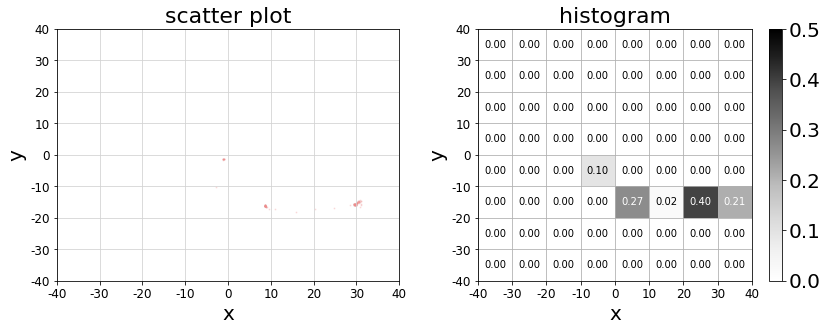

In [59]:
from eyetracking_analysis import eyetracking_analysis
eyetracking_analysis(session_df_selected, session_obj, TRIAL_THRESHOLD=None)

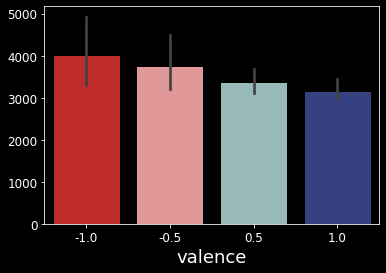

In [181]:
from session_timing import plot_latency
plot_latency(session_df_correct, session_obj)

In [110]:
def trial_time(row):
	row['Trial Time'] = row['Outcome'] - row['CS On']
	return row

session_df_correct = session_df_correct.apply(trial_time, axis=1)
session_df_correct[['Trial Time']].head(20)

,Trial Time
1,1880
2,<NA>
3,<NA>
4,1886
5,<NA>
6,<NA>
7,1887
8,1886
9,1887
10,<NA>


  cs average: 369
  cs min: 368 | index: 0
  trace + cs average: 1733
  trace + cs min: 1239 | index: 1
  outcome + cs average: 2421
  outcome + cs min: 2419
  raster_by_cond_1.png saved.


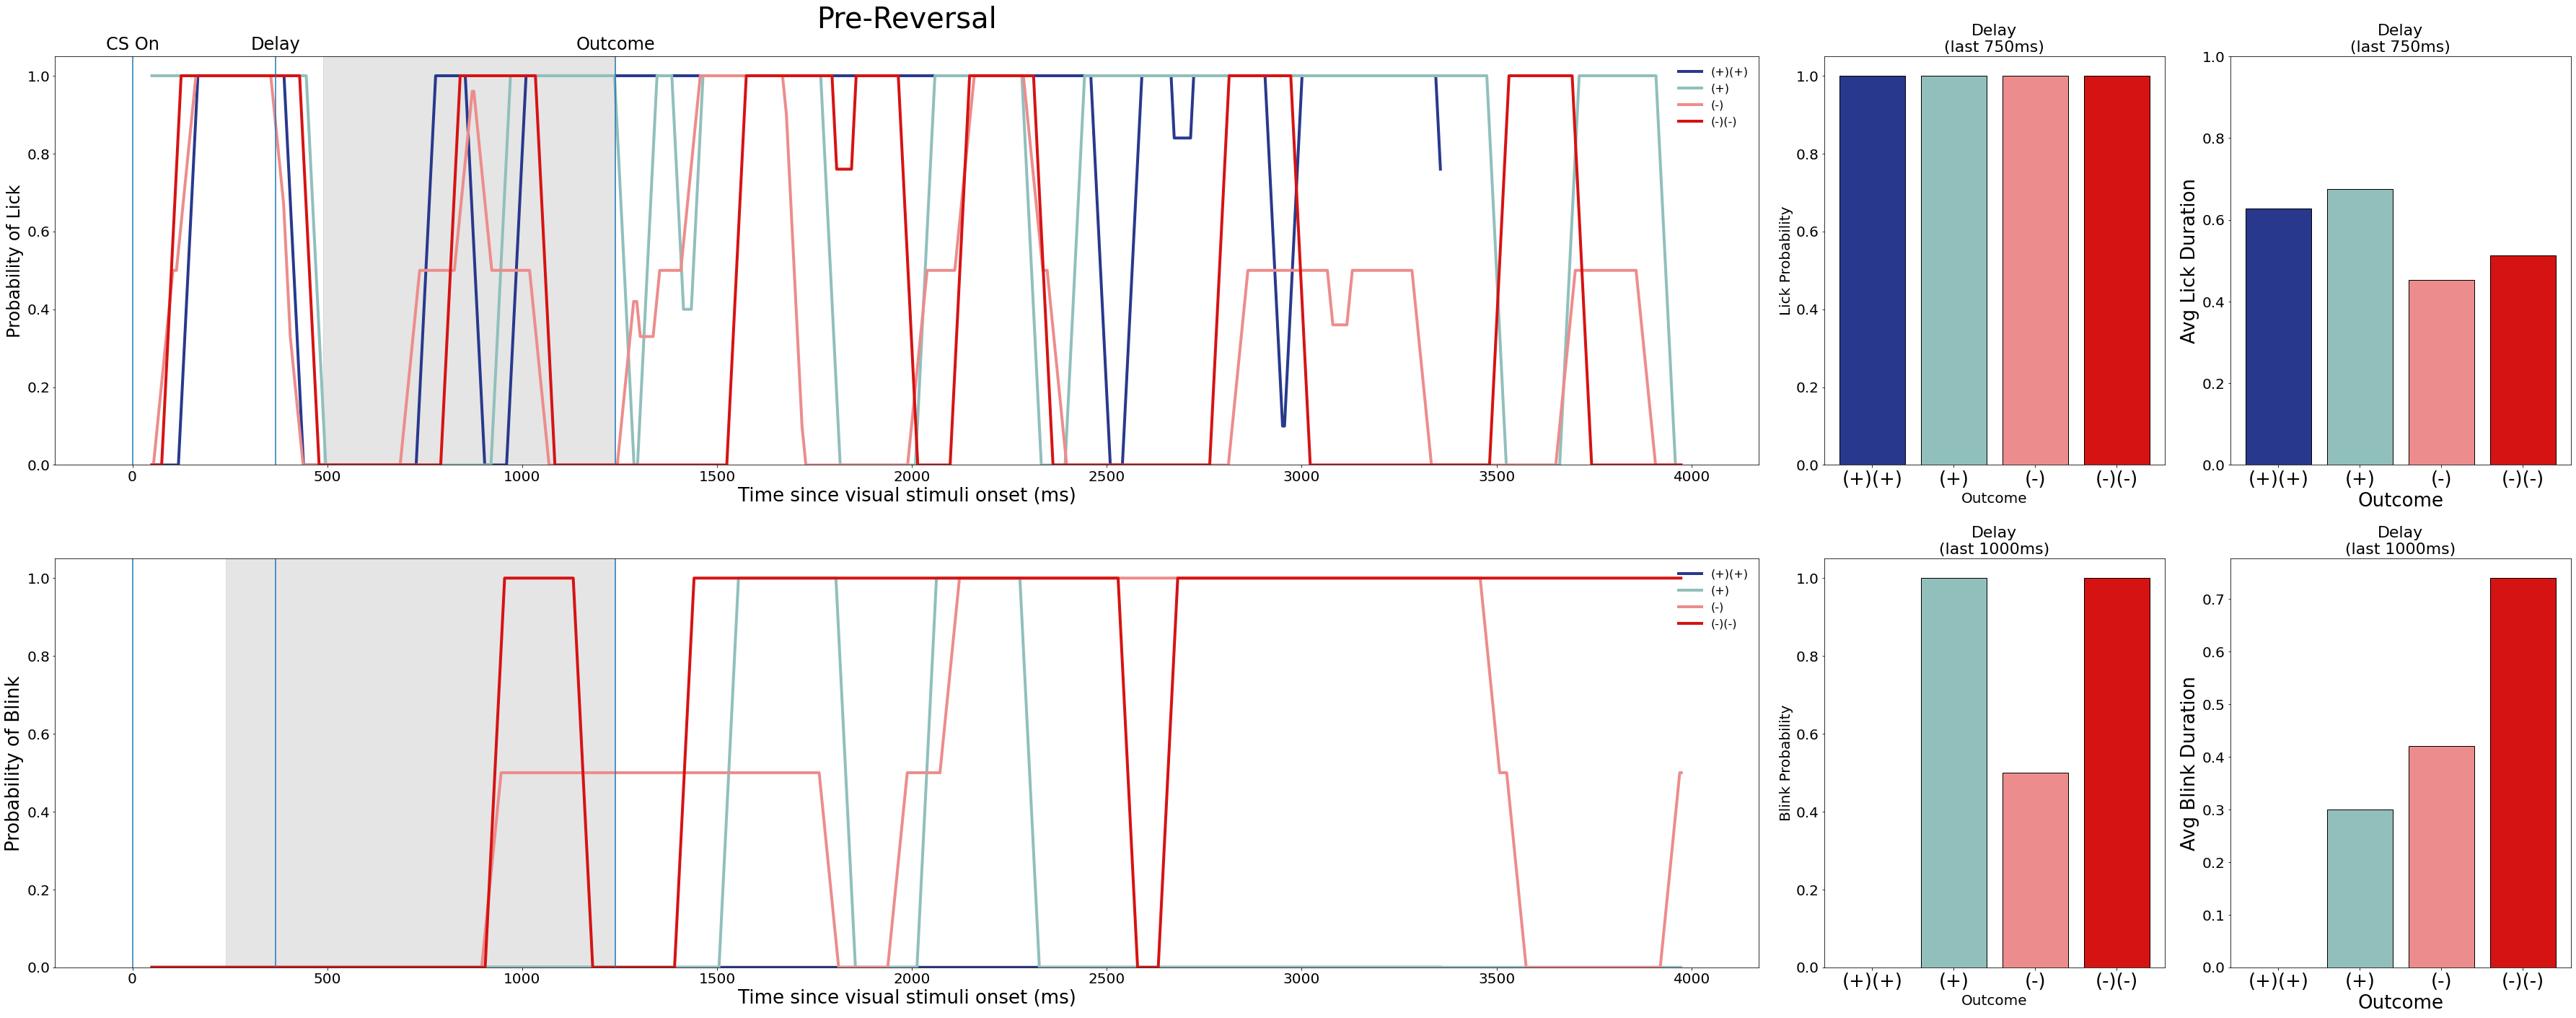

KeyError: "['latency'] not in index"

In [44]:
from raster_by_condition import raster_by_condition
trial_60 = session_df_correct.iloc[105:110]
session_df_count = trial_60[trial_60['fractal_count_in_block'] > 10]
raster_by_condition(session_df_count, session_obj)
session_df_count[['trial_num', 'valence', 'fractal_count_in_block', 'lick_raster', 'latency']]

In [61]:
trial_num = 106
print(session_df_correct.iloc[trial_num]['Trace End'] - session_df_correct.iloc[trial_num]['Trace Start'])
session_df_correct.iloc[trial_num][['trial_num', 'valence', 'Fixation Success', 'CS On', 'Trace Start', 'Trace End', 'Outcome']]

trial_num            110
valence              1.0
Fixation Success    2287
CS On               2302
Trace Start         2686
Trace End           3557
Outcome             3571
Name: 109, dtype: object